In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.


In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# root_path = "/content/drive/My Drive/Image_Dataset/"
# count = 0
# data = []
# label = []
# for i in range(26):
#     s = chr(ord('A') + i)
#     for filename in os.listdir(root_path+s):
#         if filename.endswith(".png"):
#             img = image.load_img(root_path + s + "/" + filename)
#             img_matrix = image.img_to_array(img)
#             resized_img = tf.image.resize(img_matrix, [60, 80])
#             data.append(resized_img)
#             label.append(i)
#             count +=1
#             if(count%500==0):
#                 print(count)
# print(count)

Letter -  A


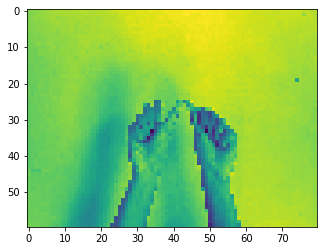

In [65]:
example_no = 108
plt.imshow(data[example_no][:,:,0])
print("Letter - ", chr(ord('A') + label[example_no]))

Letter -  W


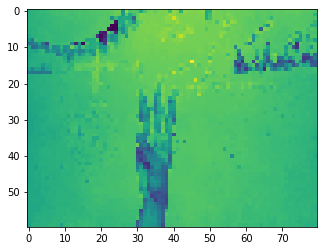

In [69]:
mapIndexPosition = list(zip(data, label))
np.random.seed(1) #using seed = 1 to get same results every time
np.random.shuffle(mapIndexPosition)
data, label = zip(*mapIndexPosition)
example_no = 108
plt.imshow(data[example_no][:,:,0])
print("Letter - ", chr(ord('A') + label[example_no]))

In [80]:
# print(data[0].shape)
# X = np.zeros((len(data), data[0].shape[0], data[0].shape[1], data[0].shape[2]))
# Y = np.zeros(len(data))
# for i in range(len(data)):
#     X[i] = data[i]
#     Y[i] = label[i]
# # print(X.shape, Y.shape)
# # print(Y[0])
# # print(X[0])

(60, 80, 3)


In [0]:
# split = (int)((4/5)*len(data))
# X_train = X[:split,:,:,:]
# Y_train = to_categorical(Y[:split], 26)
# X_test = X[split:,:,:,:]
# Y_test = to_categorical(Y[split:], 26)

In [0]:
data = np.load('/content/drive/My Drive/ISL data/data.npz')
X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']

In [9]:
print("X-train shape = ", X_train.shape)
print("Y-train shape = ", Y_train.shape)
print("X-test shape = ", X_test.shape)
print("Y-test shape = ", Y_test.shape)


X-train shape =  (5811, 60, 80, 3)
Y-train shape =  (5811, 26)
X-test shape =  (1453, 60, 80, 3)
Y-test shape =  (1453, 26)


In [0]:
def model(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  

    """
    X_input = Input(input_shape, name="Input1")

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv1')(X)
    X = BatchNormalization(name = 'bn1')(X)
    X = Activation('relu')(X)


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(26, activation='softmax', name='FC')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Basic Model')

    return model

In [11]:
model = model(X_train.shape[1:])
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "Basic Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input1 (InputLayer)          (None, 60, 80, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 66, 86, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 60, 80, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 60, 80, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 80, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 30, 40, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 19, 64)        

In [12]:
model.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 64)

Epoch 1/20
5811/5811 [==============================] - 10s 2ms/step - loss: 1.1131 - accuracy: 0.7364
Epoch 2/20
5811/5811 [==============================] - 4s 648us/step - loss: 0.1012 - accuracy: 0.9713
Epoch 3/20
5811/5811 [==============================] - 4s 645us/step - loss: 0.0415 - accuracy: 0.9867
Epoch 4/20
5811/5811 [==============================] - 4s 649us/step - loss: 0.0304 - accuracy: 0.9917
Epoch 5/20
5811/5811 [==============================] - 4s 651us/step - loss: 0.0188 - accuracy: 0.9950
Epoch 6/20
5811/5811 [==============================] - 4s 659us/step - loss: 0.0172 - accuracy: 0.9962
Epoch 7/20
5811/5811 [==============================] - 4s 662us/step - loss: 0.0072 - accuracy: 0.9981
Epoch 8/20
5811/5811 [==============================] - 4s 664us/step - loss: 0.0393 - accuracy: 0.9919
Epoch 9/20
5811/5811 [==============================] - 4s 658us/step - loss: 0.0363 - accuracy: 0.9919
Epoch 10/20
5811/5811 [==============================] - 4s 658us

In [13]:
model.evaluate(x = X_test, y= Y_test)

1453/1453 [==============================] - 1s 394us/step


[0.11196980664786337, 0.9745354652404785]